### Goals of Exercise:
 - Get familiar with utilizing Logistic Regression in our modeling workflow
 - Repeating and iterating on our process of practicing model training, validating, and selection
 - Examing the effects of hyperparameters on the outcomes of models
 - Examing the effects of feature space on the output of logistic regressions

### Familiarities:
 - We are going to acquire the Titanic Data
 - We are going to prep the Titanic data
 - We are going to utilize our modularized scripts that we have already created for ourselves, acquire.py and prepare.py in order to continue the repeatability and modularity of our workflow and ensure repeatability when deploying the data science pipeline to a project spec

In [1]:
# tabular data manipulation:
import numpy as np
import pandas as pd

# modular scripts for data wrangling
import acquire
import prepare

# if i want to do any data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn model analysis and the Logistic Regression model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Acquire Stage
df = acquire.get_titanic_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


### Data Preparation Stage

In [4]:
# prepare the data using our prepare script
train, validate, test = prepare.prep_titanic(df)

/Users/madeleinecapper/Documents/student-facing/leavitt/leavitt-classification-exercises/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


In [5]:
# Split the datasets
# Separate out our X and y values
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [6]:
dropcols = ['embarked', 'class','embark_town']

In [7]:
X_train = X_train.drop(columns=['embarked', 'class','embark_town'])

In [8]:
X_validate, X_test = X_validate.drop(columns=dropcols), X_test.drop(columns=dropcols)

> **Insert Exploratory Data Analysis here**

### Setup the Baseline

In [11]:
# The most frequenly observed outcome will be our baseline
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [14]:
baseline_accuracy = round((train.survived == 0).mean(), 2)

In [15]:
baseline_accuracy

0.62

### Exercise 1
- Create a model using age, fare, and pclass
- Does this model beat the baseline?

In [16]:
X_train.columns

Index(['passenger_id', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'alone', 'Q', 'S'],
      dtype='object')

In [17]:
# same thing as its been: create, fit, use

In [19]:
# Create the logistic regression
logit = LogisticRegression(random_state=1349)

# specify the features we're using
selected_feats = ['age', 'pclass', 'fare']

# Fit a model using only these specified features
logit.fit(X_train[selected_feats], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[selected_feats])

In [20]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[selected_feats], y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.72


### Exercise 2

Create a model using age, fare, pclass, and gender

In [24]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=1349)

# specify the features we're using
features = ['age', 'fare', 'pclass', 'sex']

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.80


### Exercise 3


Try out other combinations of features and models.

Models Created:
- `logit2`, all Features, 
- `logit3`, all features with class_weight="balanced", 
- `logit4`, only age, 
- `logit5`, only pclass, 
- `logit6`, C hyperparameter close to zero, 

In [25]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=1349)
logit2.fit(X_train, y_train)


print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.79


/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=1349, class_weight='balanced')
logit3.fit(X_train, y_train)
y_pred = logit3.predict(X_train)
accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.78


/opt/homebrew/anaconda3/envs/homebase/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Only Age 
logit4 = LogisticRegression(random_state=1349)
logit4.fit(X_train[['age']], y_train)
accuracy = logit4.score(X_train[['age']], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [30]:
# Only pclass

logit5 = LogisticRegression(random_state=1349)
logit5.fit(X_train[['pclass']], y_train)
accuracy = logit5.score(X_train[['pclass']], y_train)



print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.68


In [31]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=1349, C=0.0001)
logit6.fit(X_train, y_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.62
Accuracy of this Logistic Regression on training set: 0.66


## Now Let's Pick our Best Models and Evaluate on Validate!
- `logit1` trained with `features = ["age", "pclass", "fare", "is_female"]` has .81 accuracy on train
- `logit2` trained on all features, with all other hyperparameters defaulted, has .82 accuracy on train
- `logit3` trained on all features with `class_weight='balanced'` has accuracy of .80 on train

In [34]:
# Let's determine logit1's metrics on validate
features = ["age", "fare", "pclass", "sex"]

y_pred = logit1.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       132
           1       0.73      0.70      0.71        82

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



In [35]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.71      0.67      0.69        82

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.77      0.77       214



In [36]:
# Logit uses all features and class_weight='balanced'
features = ['age', 'pclass', 'fare']
y_pred = logit.predict(X_validate[features])

print("Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default")
print(classification_report(y_validate, y_pred))

Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       132
           1       0.71      0.49      0.58        82

    accuracy                           0.73       214
   macro avg       0.72      0.68      0.69       214
weighted avg       0.73      0.73      0.72       214



In [37]:
# takeaways: logit1 is doing the best out of the models that I have used in evaluating on the 
# validation sets.  Going forward from this point, in a real project scenario,
# I would benchmark these results against other model types:
# I would also examine the feature space in my model, the feature coefficients, and examine
# the importance of each to further bolster my EDA and determine the best drivers
# for the outcome of my most successful model(s)

## What next?
- Consider the precision and recall values from each model. 
- Experiment with more hyperparameter values and combinations
- Handle the age nulls differently
    - We could try filling the nulls with median age instead of average age
    - We could drop the nulls if they weren't such a large proportion of the dataset
- Feature engineering
- Handling outliers
- Scaling (we'll do this later)

Once we have a single model doing really well on `train` and `validate`, then we'll select that model to evaluate on `test`.


#### Bonus: Choosing different probability threshold:
Default threshold value is 0.5   
We choose a **threshold t** such that if $P(y = 1) > t$, we predict 1, else we predict 0.

- A threshold is a value we choose  
- if the probability the model gives us is above the threshold, predict positive  
- if the probability the model gives us is below the threshold, predict negative  
- .predict -- makes predictions with a threshold of .5  
- When the threshold is 0, predict everything as positive (i.e. 1)  
- When the threshold is 1, predict everything as negative (i.e. 0)

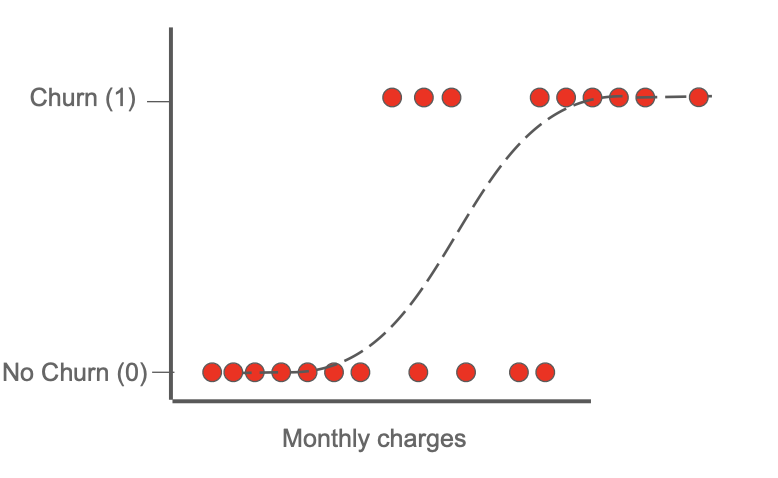

In [38]:
# using logit3 model for demo here

y_pred_proba = logit3.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.695661,0.304339
1,0.111502,0.888498
2,0.821001,0.178999
3,0.132534,0.867466
4,0.062454,0.937546


In [39]:
# Set new threshold as 0.3 instead of 0.5
t = 0.3

# masking: True or False, is the predicted probability of our positive class
# greater than this new probability threshold? if yes, return True/1. Cast this as
# integer type, to receive the same types of prediction that we have previously
y_pred = (y_pred_proba.survived > t).astype(int)
y_pred.head()

0    1
1    1
2    0
3    1
4    1
Name: survived, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_train, y_pred)

0.704225352112676

In [44]:
np.arange(0,1,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [46]:
# lets think about thresholds in loops:
model_scores = {}
for i in np.arange(0,1,.1):
    y_pred = (y_pred_proba.survived > i).astype(int)
    accuracy = accuracy_score(y_train, y_pred)
    model_scores[f'threshold {i}'] =  accuracy

In [47]:
model_scores

{'threshold 0.0': 0.3822937625754527,
 'threshold 0.1': 0.42655935613682094,
 'threshold 0.2': 0.6056338028169014,
 'threshold 0.30000000000000004': 0.704225352112676,
 'threshold 0.4': 0.7706237424547284,
 'threshold 0.5': 0.7847082494969819,
 'threshold 0.6000000000000001': 0.7947686116700201,
 'threshold 0.7000000000000001': 0.7967806841046278,
 'threshold 0.8': 0.7987927565392354,
 'threshold 0.9': 0.7022132796780685}

In [42]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       307
           1       0.58      0.84      0.69       190

    accuracy                           0.70       497
   macro avg       0.72      0.73      0.70       497
weighted avg       0.75      0.70      0.71       497

